# What is Image Classification
- The classification problem is to categorize all the pixels of a digital image into one of the defined classes.
- Image classification is the most critical use case in digital image analysis.
- Image classification is an application of both supervised classification and unsupervised classification.
- In supervised classification, we select samples for each target class. We train our neural network on these target class samples and then classify new samples.
- In unsupervised classification, we group the sample images into clusters of images having similar properties. Then, we classify each cluster into our intended classes.

# About Image Classification Dataset
- CIFAR-10 is a very popular computer vision dataset. This dataset is well studied in many types of deep learning research for object recognition.

- This dataset consists of 60,000 images divided into 10 target classes, with each category containing 6000 images of shape 32*32. This dataset contains images of low resolution (32*32), which allows researchers to try new algorithms. The 10 different classes of this dataset are:

1. Airplane										
2. Car
3. Bird										
4. Cat										
5. Deer										
6. Dog										
7. Frog										
8. Horse										
9. Ship										
10. truck										

- CIFAR-10 dataset is already available in the datasets module of Keras. We do not need to download it; we can directly import it from keras.datasets.
- Other wise you can download it from [Dataset Link](https://www.cs.toronto.edu/~kriz/cifar.html)



# Importing required library

In [1]:
# importing all the required library

import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

# Loading the dataset

In [2]:
# our dataset is present in keras.datasets 

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


# Plotting data

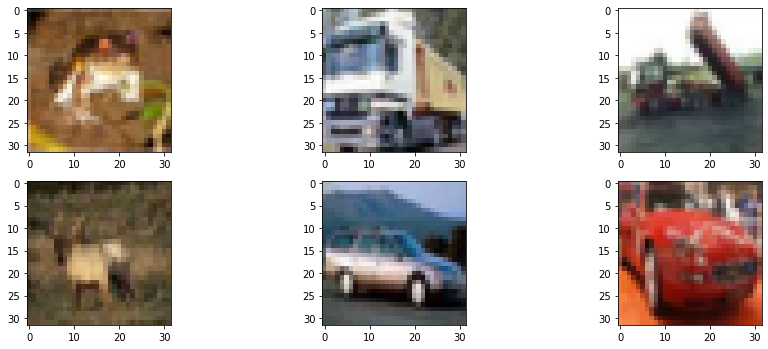

In [3]:
# plotting the data to display the images

number_of_images=6
plt.figure(figsize=(15,9))
for index in range(number_of_images):
    plt.subplot(330+1+index)
    plt.imshow(train_X[index])
plt.show()

# Convert the pixel value of the dataset to float type and then normalize the dataset

In [4]:
train_x = train_X.astype('float32')
train_y = train_Y.astype('float32')

train_x = train_X/255.0
train_y = train_Y/255.0

# Now we will perform one hot encoding for target class

In [5]:
train_Y = utils.to_categorical(train_Y)
test_Y = utils.to_categorical(test_Y)

num_classes = test_Y.shape[1]

# Create the sequential model and add the layers

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3), input_shape=(32,32,3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

2022-02-03 11:24:48.386556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-03 11:24:48.480686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-03 11:24:48.481357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-03 11:24:48.482633: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

# Configure the optimizer and compile the model

In [7]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=False, decay=(0.01/25))
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# View the model summary for better understanding of model architecture

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

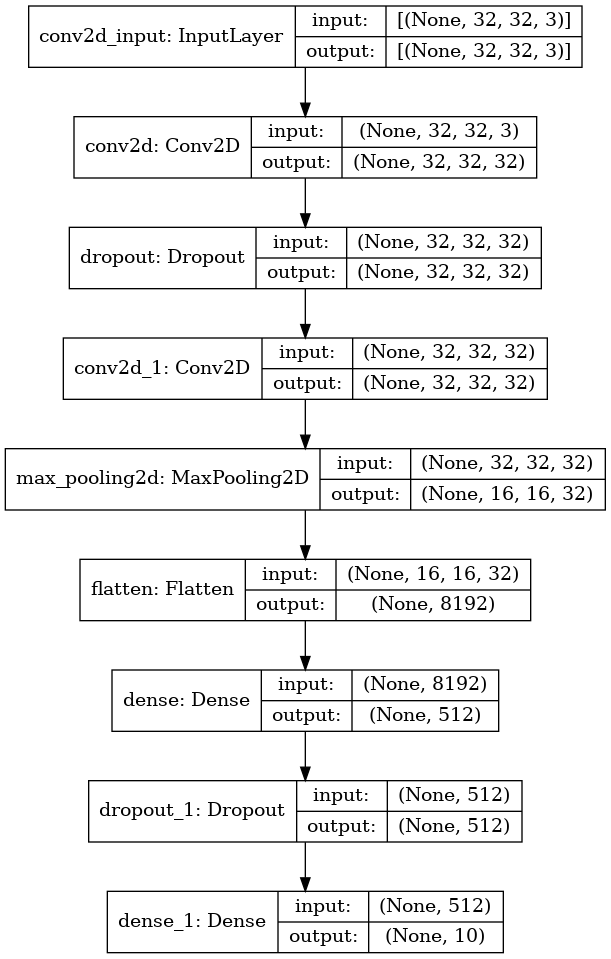

In [9]:
# uncomment below comment to visualize the mode architecture

tf.keras.utils.plot_model(model, show_shapes=True)

# Training our model

In [10]:
model.fit(train_x,train_Y,validation_data=(test_X,test_Y),epochs=30,batch_size=32)

2022-02-03 11:24:53.587326: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-02-03 11:24:54.885599: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 14s 4ms/step - loss: 1.7365 - accuracy: 0.3710 - val_loss: 236.7735 - val_accuracy: 0.2734
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3811 - accuracy: 0.5017 - val_loss: 300.0618 - val_accuracy: 0.2800
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2235 - accuracy: 0.5621 - val_loss: 249.5047 - val_accuracy: 0.3154
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1135 - accuracy: 0.6048 - val_loss: 311.3141 - val_accuracy: 0.2325
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0140 - accuracy: 0.6377 - val_loss: 282.5900 - val_accuracy: 0.2525
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9402 - accuracy: 0.6677 - val_loss: 344.6060 - val_accuracy: 0.2683
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8701 - accuracy: 0.6915 - val_loss: 259.2882 - val_accur

# Calculate accuracy on test data

In [11]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 1s 2ms/step - loss: 403.9766 - accuracy: 0.3817
38.17000091075897


# Save the model and use it later

In [12]:
model.save('cifar-10.h5')

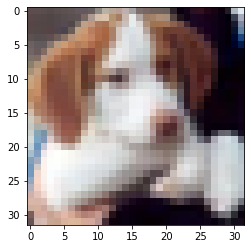

Class Predicted:  3 
Label Predicted:  Cat


In [13]:
result = {
    0:'Airplane',
    1:'Car',
    2:'Bird',
    3:'Cat',
    4:'Deer',
    5:'Dog',
    6:'Frog',
    7:'Horse',
    8:'Ship',
    9:'Truck'
    }


# the input image is required to be in the shape of dataset , i.e (32,32,3)
im = Image.open('../input/cifar10-pngs-in-folders/cifar10/test/dog/0002.png')

# if our image is on in format of (32,32,3) we need to change it usign 
# im=im.resize((32,32))

plt.imshow(im)
plt.show()
im = np.expand_dims(im,axis=0)
im = np.array(im)

# now that our image is ready we can predict it using our model
prediction = model.predict(im) 
classes = np.argmax(prediction,axis=1)[0]
print("Class Predicted: ",classes,"\nLabel Predicted: ",result[classes])

# Make dictionary to map to the output classes and make predictions from the model

# Summary:
- The objective of the image classification project was to enable the beginners to start working with Keras to solve real-time deep learning problems.
- In this tensorflow-keras deep learning Project, we talked about the image classification paradigm for digital image analysis. We discuss supervised and unsupervised image classifications.
- Then it explains the CIFAR-10 dataset and its classes. Finally, we saw how to build a convolution neural network for image classification on the CIFAR-10 dataset.